In [1]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [5]:
Happiness_df: dict[str, pd.DataFrame] = {
    "Happiness_df15": pd.read_csv("archive (2)/2015.csv"),
    "Happiness_df16": pd.read_csv("archive (2)/2016.csv"),
    "Happiness_df17": pd.read_csv("archive (2)/2017.csv"),
    "Happiness_df18": pd.read_csv("archive (2)/2018.csv"),
    "Happiness_df19": pd.read_csv("archive (2)/2019.csv")
}

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [7]:

display(Happiness_df["Happiness_df15"].head())

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [8]:

display(Happiness_df["Happiness_df16"].head())

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [9]:

display(Happiness_df["Happiness_df17"].head())

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [10]:

display(Happiness_df["Happiness_df18"].head())

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [12]:

display(Happiness_df["Happiness_df19"].head())

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [13]:
print("Information about data set in 2015")

Happiness_df["Happiness_df15"].info()
print("------------------------------")
print("Information about data set in 2016")

Happiness_df["Happiness_df16"].info()
print("------------------------------")
print("Information about data set in 2017")

Happiness_df["Happiness_df17"].info()
print("Information about data set in 2018")

Happiness_df["Happiness_df18"].info()
print("------------------------------")
print("Information about data set in 2019")

Happiness_df["Happiness_df19"].info()


Information about data set in 2015
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), 

In [14]:
Happiness_df["Happiness_df15"].describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [15]:

Happiness_df["Happiness_df16"].describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [16]:

Happiness_df["Happiness_df17"].describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [17]:

Happiness_df["Happiness_df18"].describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112000
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096492
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.137000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


In [18]:

Happiness_df["Happiness_df19"].describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [20]:
Happiness_df["Happiness_df15"].columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [22]:

Happiness_df["Happiness_df16"].columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [23]:

Happiness_df["Happiness_df17"].columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [24]:

Happiness_df["Happiness_df18"].columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [25]:

Happiness_df["Happiness_df19"].columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [ ]:
#The data undergoes rigorous sourcing and collection processes, ensuring its reliability and trustworthiness.
# We adhere to standardized procedures, employ robust quality control measures, and prioritize transparency 
# in documentation. Through careful sampling strategies and ethical considerations, we maintain the integrity 
# and accuracy of our data, enabling informed decision-making and
# insightful analysis.

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [ ]:
#The data does not need to be up-to-date as it pertains to historical trends or analysis that do not require real-time information. Therefore, timeliness is not a critical
#factor for this dataset.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [ ]:
#The data does not contain consistencies within the dataset or across multiple data sources. Each data point
# maintains uniformity and coherence throughout the dataset and across various sources.

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [27]:
# here we have general mapping for all different column names, we will use snake_case for the naming snake_cae
column_mapping = {
    'Country': 'country', 
    'Country or region': 'country', 
    'Region': 'region', 
    'Happiness Rank': 'happiness_rank', 
    'Overall rank': 'happiness_rank',
    'Happiness.Rank': 'happiness_rank',
    'Happiness Score': 'happiness_score', 
    'Happiness.Score': 'happiness_score',
    'Score': 'happiness_score',
    'Standard Error': 'standard_error',
    'Lower Confidence Interval': 'lower_confidence_interval',
    'Upper Confidence Interval': 'upper_confidence_interval',
    'Whisker.high': 'whisker_high',
    'Whisker.low': 'whisker_low',
    'Economy (GDP per Capita)': 'gdp_per_capita', 
    'GDP per capita': 'gdp_per_capita', 
    'Economy..GDP.per.Capita.': 'gdp_per_capita', 
    'Family': 'social_support',
    'Social support': 'social_support',
    'Health (Life Expectancy)': 'life_expectancy', 
    'Healthy life expectancy': 'life_expectancy', 
    'Health..Life.Expectancy.': 'life_expectancy',
    'Freedom': 'freedom', 
    'Freedom to make life choices': 'freedom',
    'Trust (Government Corruption)': 'government_trust', 
    'Trust..Government.Corruption.': 'government_trust',
    'Perceptions of corruption': 'government_trust',
    'Generosity': 'generosity',
    'Dystopia Residual': 'dystopia_residual',
    'Dystopia.Residual': 'dystopia_residual'
}

In [28]:
for key in Happiness_df.keys():
    Happiness_df[key].rename(mapper=column_mapping, inplace=True, axis=1)

In [31]:
# data frames with region
region_mapper = dict(Happiness_df["Happiness_df15"][["country","region"]].values)
region_mapper.update(dict(Happiness_df["Happiness_df16"][["country","region"]].values))

for key in ["Happiness_df17","Happiness_df18","Happiness_df19"]: 
    Happiness_df[key]["region"] = Happiness_df[key]["country"].apply(lambda x: region_mapper.get(x, "Unknown!"))
    
    

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [34]:
# We do not have duplicate rows

Happiness_df["Happiness_df15"].duplicated().sum()

0

In [35]:
## We do not have duplicate rows

Happiness_df["Happiness_df16"].duplicated().sum()

0

In [36]:
## We do not have duplicate rows

Happiness_df["Happiness_df17"].duplicated().sum()

0

In [37]:
## We do not have duplicate rows

Happiness_df["Happiness_df18"].duplicated().sum()

0

In [38]:
## We do not have duplicate rows

Happiness_df["Happiness_df19"].duplicated().sum()

0

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [46]:
#Display number missing values per column
Happiness_df["Happiness_df15"].isnull().sum().sort_values(ascending = False)

country              0
region               0
happiness_rank       0
happiness_score      0
standard_error       0
gdp_per_capita       0
social_support       0
life_expectancy      0
freedom              0
government_trust     0
generosity           0
dystopia_residual    0
dtype: int64

In [47]:
#Display number missing values per column

Happiness_df["Happiness_df16"].isnull().sum().sort_values(ascending = False)

country                      0
region                       0
happiness_rank               0
happiness_score              0
lower_confidence_interval    0
upper_confidence_interval    0
gdp_per_capita               0
social_support               0
life_expectancy              0
freedom                      0
government_trust             0
generosity                   0
dystopia_residual            0
dtype: int64

In [48]:
#Display number missing values per column

Happiness_df["Happiness_df17"].isnull().sum().sort_values(ascending = False)

country              0
happiness_rank       0
happiness_score      0
whisker_high         0
whisker_low          0
gdp_per_capita       0
social_support       0
life_expectancy      0
freedom              0
generosity           0
government_trust     0
dystopia_residual    0
region               0
dtype: int64

In [49]:
#Display number missing values per column

Happiness_df["Happiness_df18"].isnull().sum().sort_values(ascending = False)

government_trust    1
happiness_rank      0
country             0
happiness_score     0
gdp_per_capita      0
social_support      0
life_expectancy     0
freedom             0
generosity          0
region              0
dtype: int64

In [51]:
#Display number missing values per column
Happiness_df["Happiness_df19"].isnull().sum().sort_values(ascending = False)

happiness_rank      0
country             0
happiness_score     0
gdp_per_capita      0
social_support      0
life_expectancy     0
freedom             0
generosity          0
government_trust    0
region              0
dtype: int64

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [54]:
# check columns types 

Happiness_df["Happiness_df15"].dtypes

country               object
region                object
happiness_rank         int64
happiness_score      float64
standard_error       float64
gdp_per_capita       float64
social_support       float64
life_expectancy      float64
freedom              float64
government_trust     float64
generosity           float64
dystopia_residual    float64
dtype: object

In [55]:
# check columns types 

Happiness_df["Happiness_df16"].dtypes

country                       object
region                        object
happiness_rank                 int64
happiness_score              float64
lower_confidence_interval    float64
upper_confidence_interval    float64
gdp_per_capita               float64
social_support               float64
life_expectancy              float64
freedom                      float64
government_trust             float64
generosity                   float64
dystopia_residual            float64
dtype: object

In [56]:
# check columns types 

Happiness_df["Happiness_df17"].dtypes

country               object
happiness_rank         int64
happiness_score      float64
whisker_high         float64
whisker_low          float64
gdp_per_capita       float64
social_support       float64
life_expectancy      float64
freedom              float64
generosity           float64
government_trust     float64
dystopia_residual    float64
region                object
dtype: object

In [57]:
# check columns types 

Happiness_df["Happiness_df18"].dtypes

happiness_rank        int64
country              object
happiness_score     float64
gdp_per_capita      float64
social_support      float64
life_expectancy     float64
freedom             float64
generosity          float64
government_trust    float64
region               object
dtype: object

In [58]:
# check columns types 

Happiness_df["Happiness_df19"].dtypes

happiness_rank        int64
country              object
happiness_score     float64
gdp_per_capita      float64
social_support      float64
life_expectancy     float64
freedom             float64
generosity          float64
government_trust    float64
region               object
dtype: object

In [ ]:
# go to clean them 
# all data type is correct no need to clean 

Year Happiness_df15:


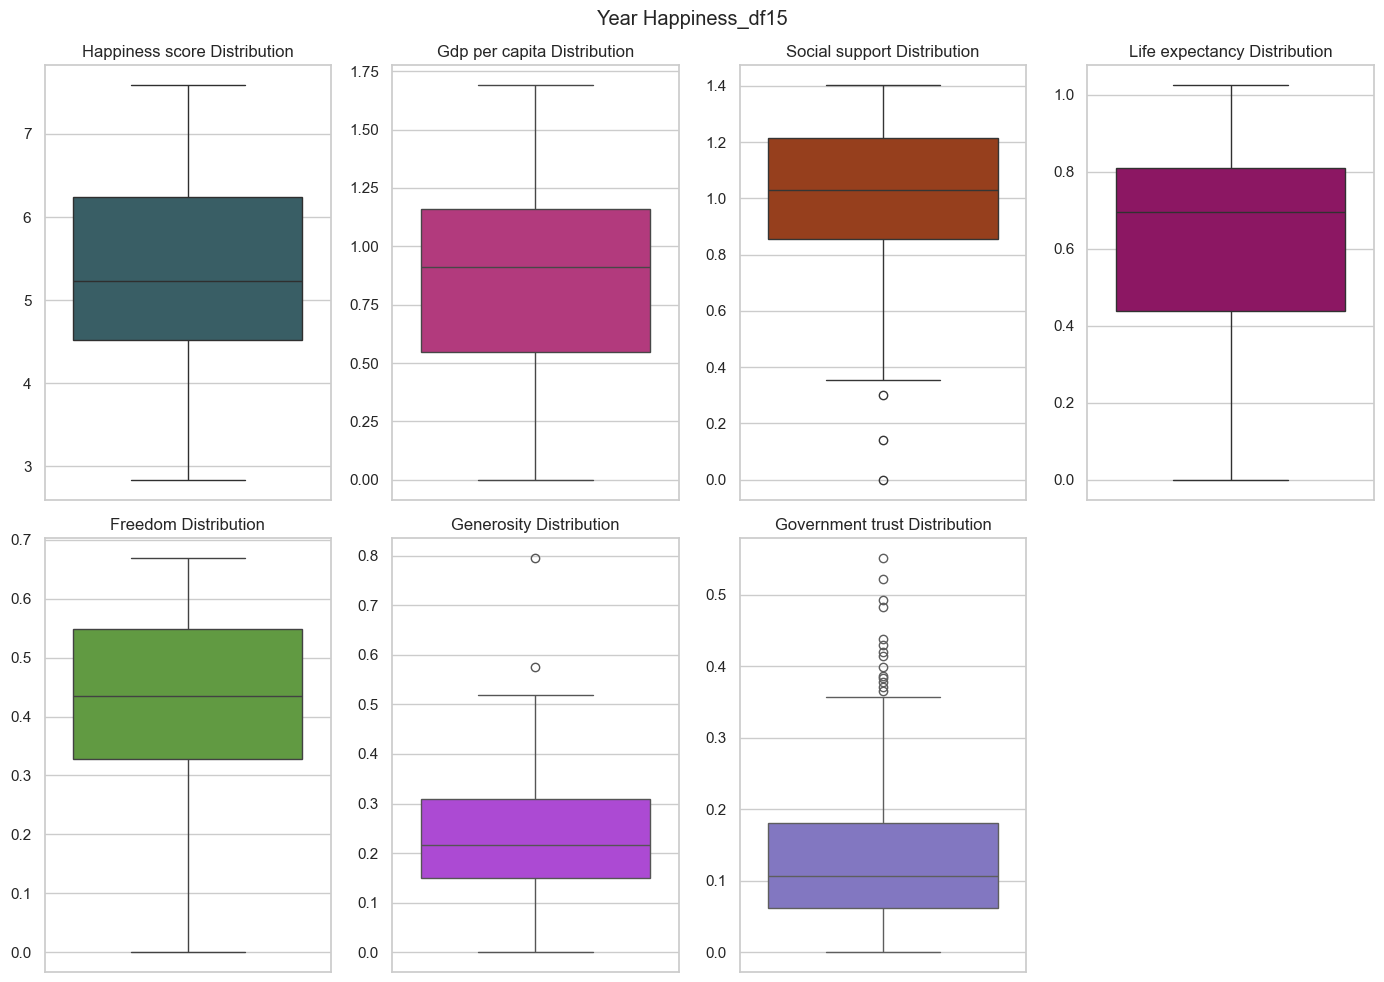





Year Happiness_df16:


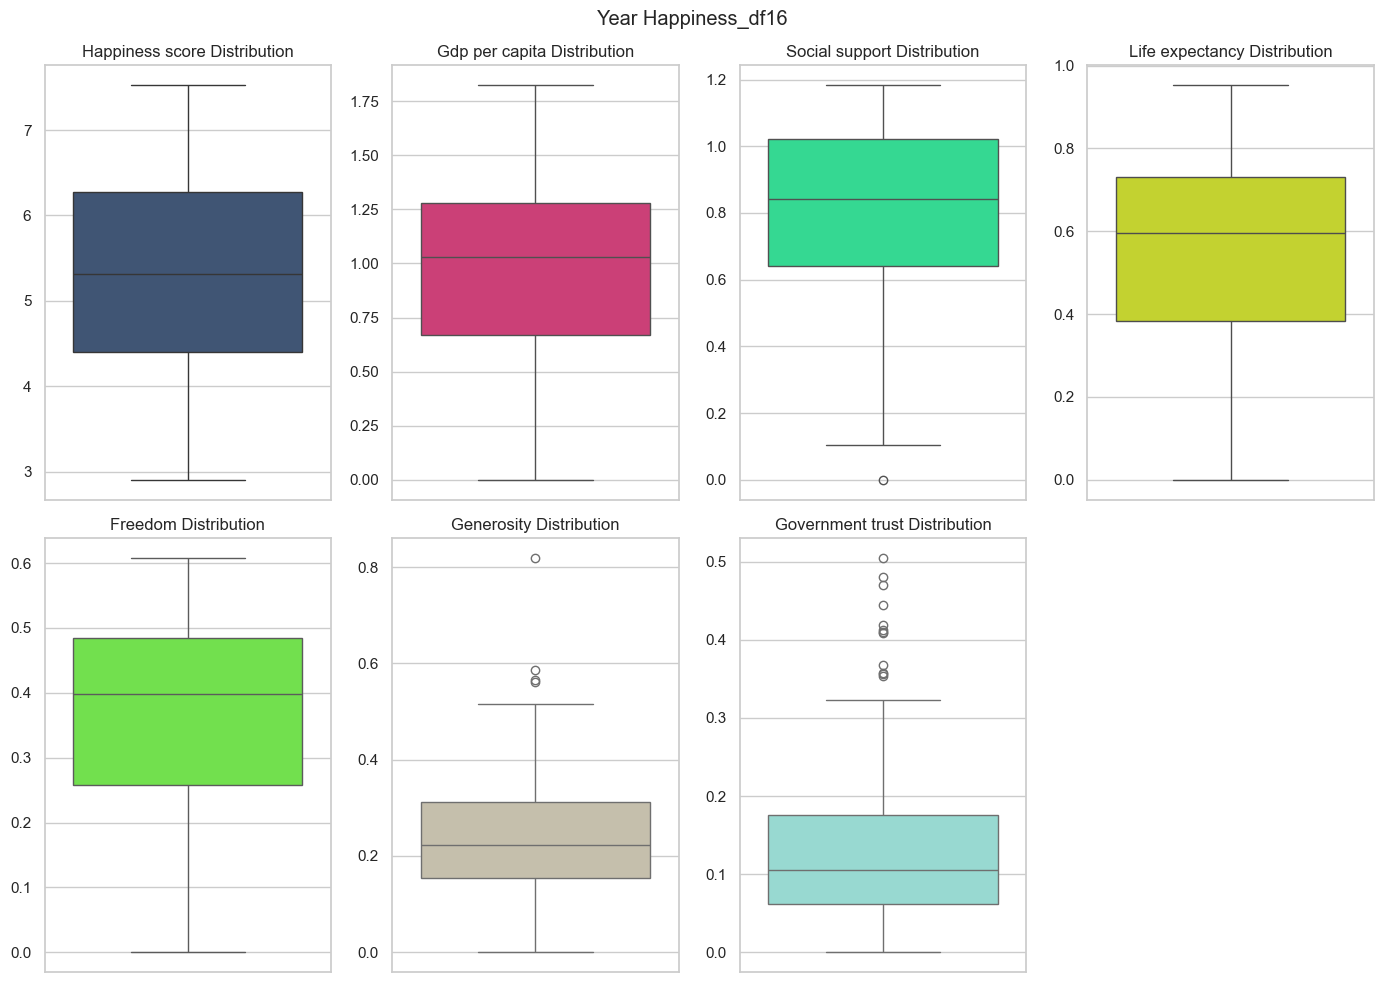





Year Happiness_df17:


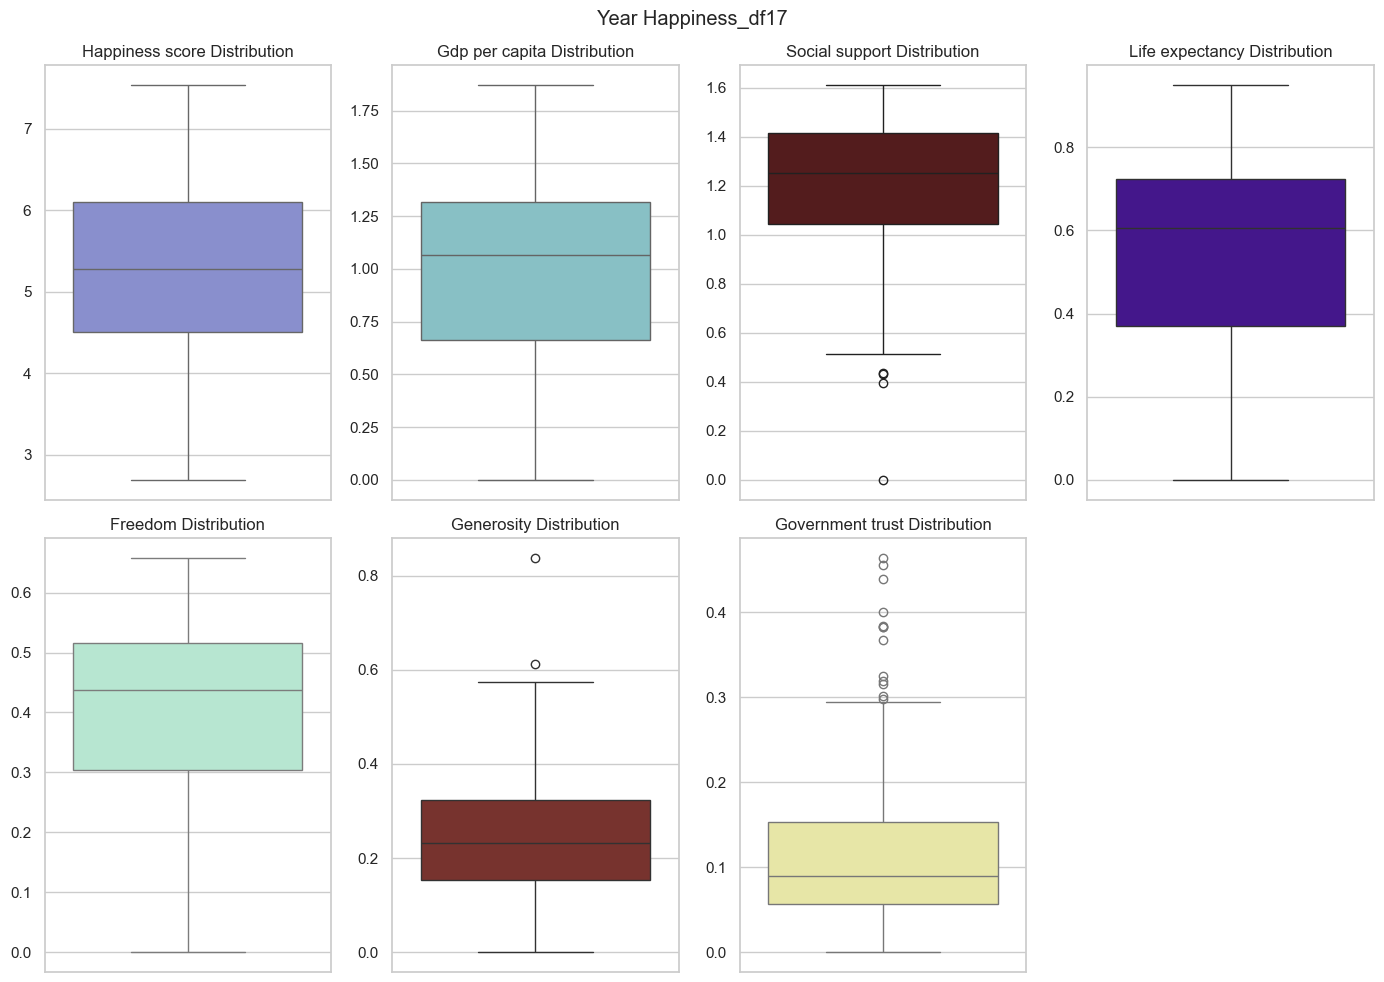





Year Happiness_df18:


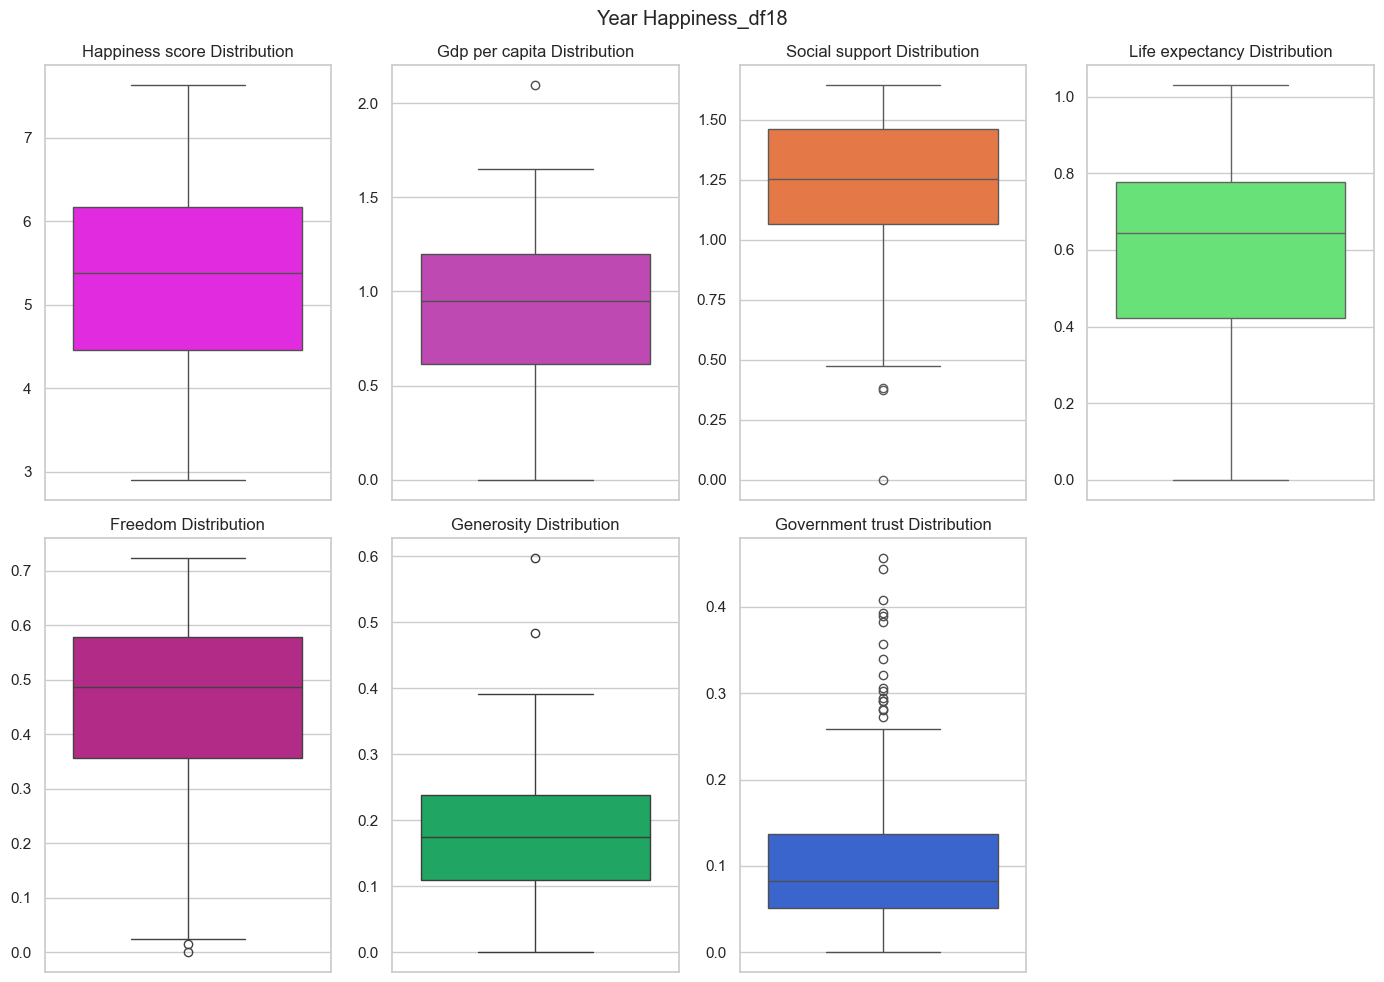





Year Happiness_df19:


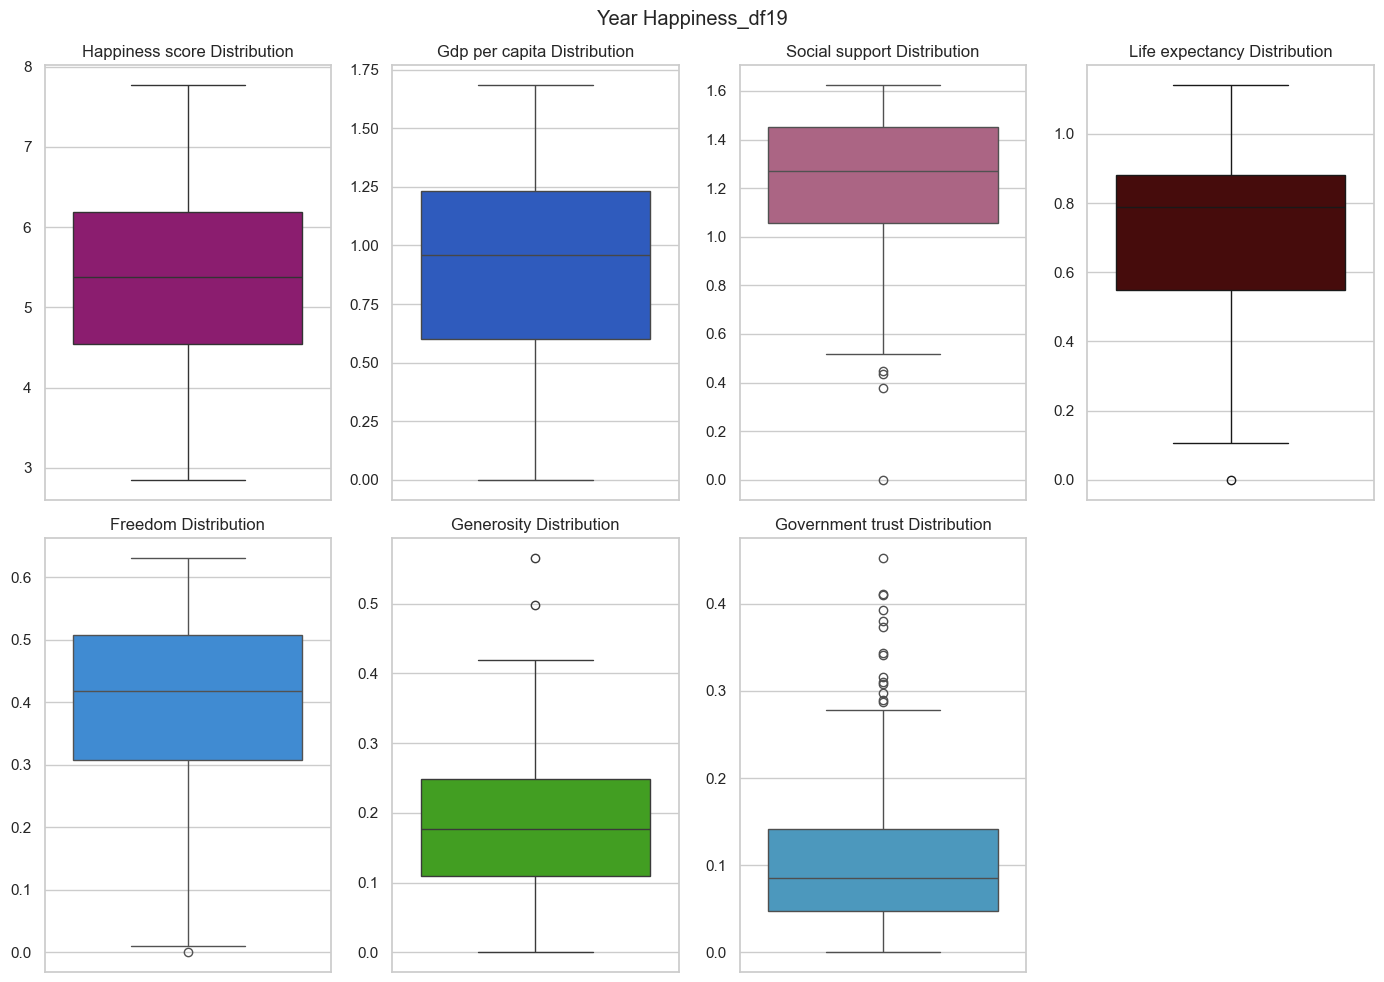

In [60]:
# It's evident that there are numerous outliers 
import seaborn as sns


# List of columns to visualize
column_list = ['happiness_score', 'gdp_per_capita', 'social_support', 'life_expectancy', 'freedom', 'generosity', 'government_trust']

# Set seaborn theme
sns.set_theme(style="whitegrid")

# Iterate over each year in the Happiness_df DataFrame
for year, data in Happiness_df.items():
    print(f"Year {year}:")
    # Create a figure for this year
    plt.figure(figsize=(14, 10))
    plt.suptitle(f"Year {year}")

    # Generate random colors for each boxplot
    colors = np.random.rand(len(column_list), 3) 

    # Iterate over each column and create a boxplot
    for idx, col in enumerate(column_list):
        # Subplot index starts from 1
        plt.subplot(2, 4, idx + 1)
        
        # Replace underscores with spaces for better display
        readable_col_name = col.replace('_', ' ')

        # Create a boxplot for the current column
        sns.boxplot(y=data[col], color=colors[idx])
        
        # Set plot title
        plt.title(f"{readable_col_name.capitalize()} Distribution")
        
        # Remove x and y labels for clarity
        plt.xlabel('')
        plt.ylabel('')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()
    print("\n\n\n")


**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [ ]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [ ]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [ ]:
# go to delete ouliers
# Looks like it is a natural outlier

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [69]:
# I will solve the missing value  in 2018 using the mean


# Calculate the mean of each column
mean_values = Happiness_df["Happiness_df18"]["government_trust"].mean()

# Fill null values with the mean
Happiness_df["Happiness_df18"].fillna(mean_values, inplace=True)

In [70]:
#Happiness_df18.isnull().sum().sort_values(ascending = False)
#Happiness_df["Happiness_df18"].isnull().sum().sort_values(ascending = False)
Happiness_df["Happiness_df18"].isnull().sum().sort_values(ascending = False)

happiness_rank      0
country             0
happiness_score     0
gdp_per_capita      0
social_support      0
life_expectancy     0
freedom             0
generosity          0
government_trust    0
region              0
dtype: int64

In [ ]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [59]:
# all data type is correct no need to clean 

In [ ]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


In [ ]:
## Looks like it is a natural outlier

## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

1-What countries or regions rank the highest in overall happiness?

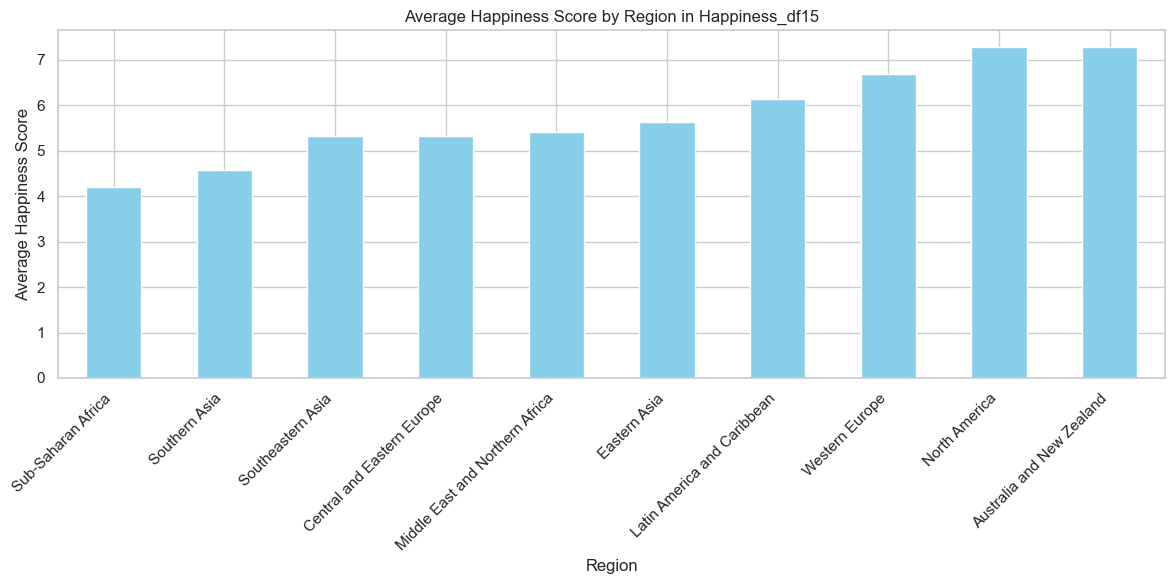

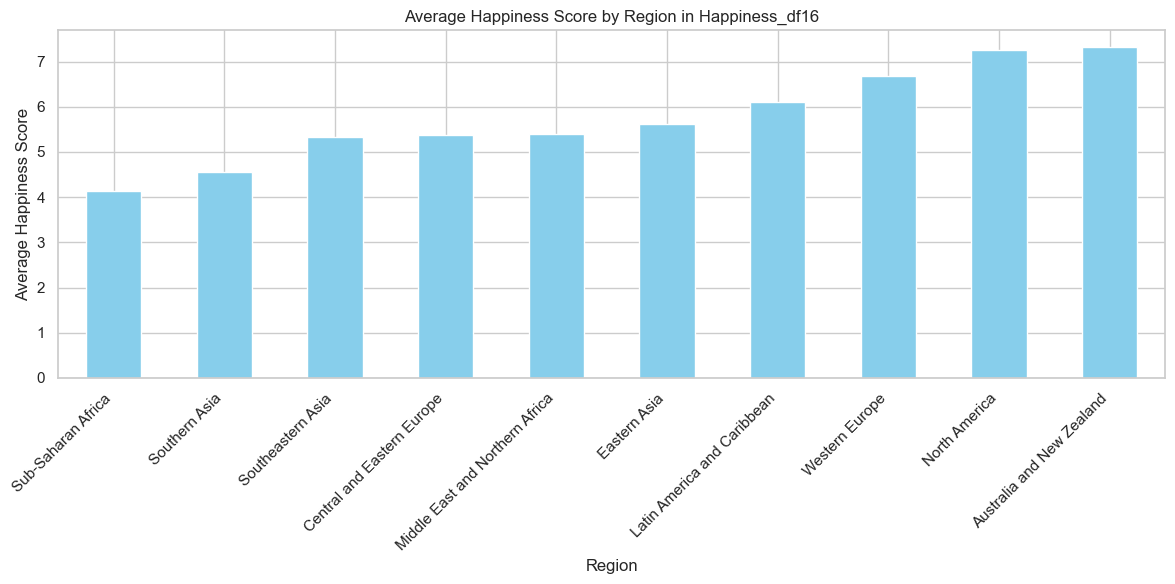

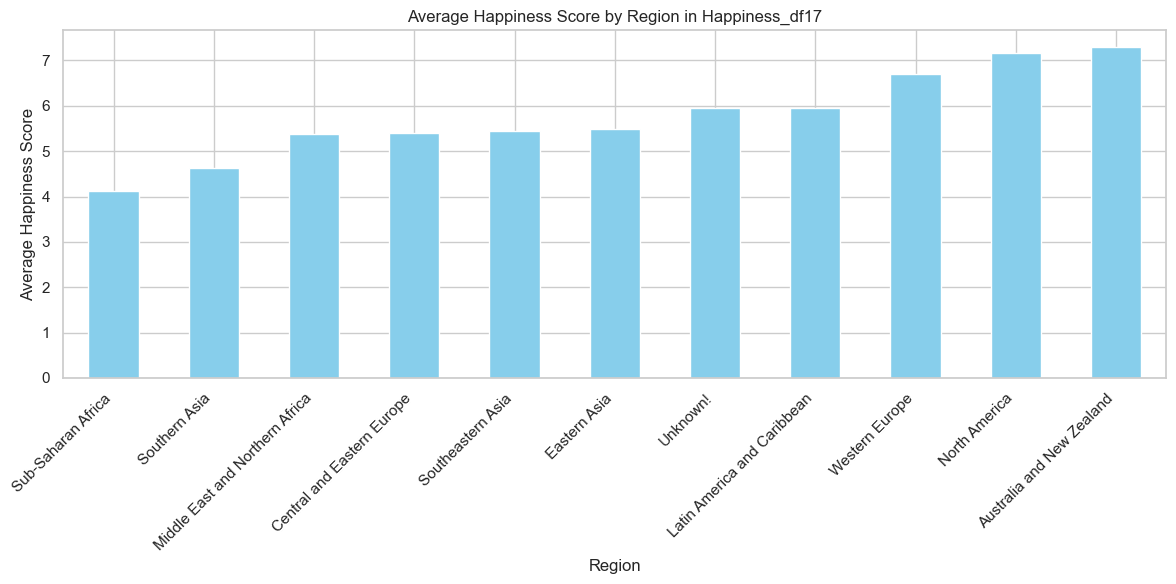

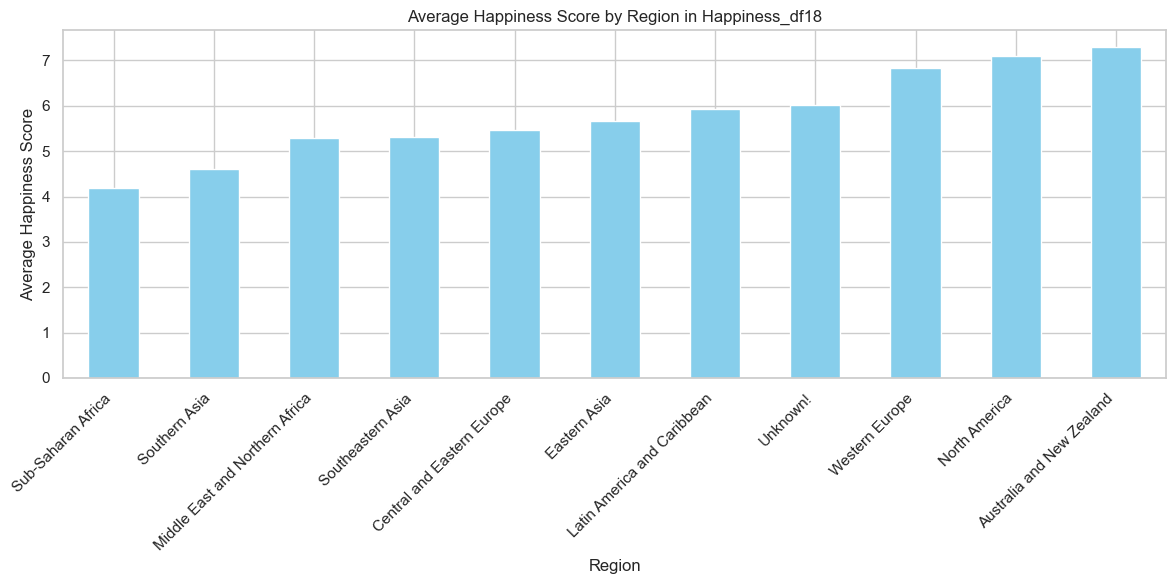

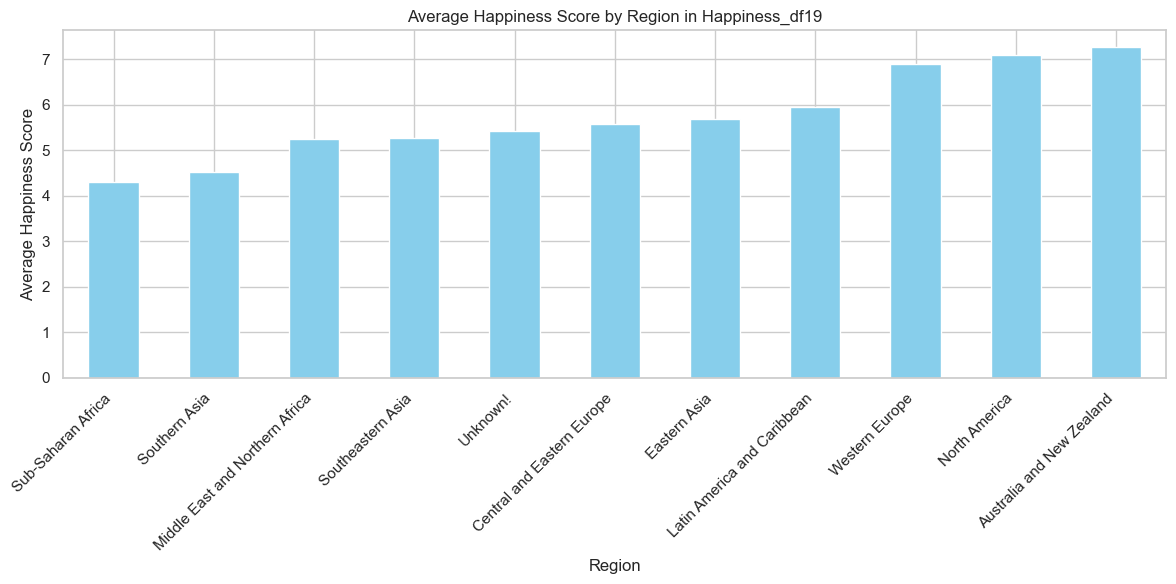

In [113]:
for key, data in Happiness_df.items():
    # Calculate average happiness score for each region
    avg_happiness_by_region = data.groupby('region')['happiness_score'].mean().sort_values()

    # Plotting
    plt.figure(figsize=(12, 6))
    avg_happiness_by_region.plot(kind='bar', color='skyblue')
    plt.title(f'Average Happiness Score by Region in {key}')
    plt.xlabel('Region')
    plt.ylabel('Average Happiness Score')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

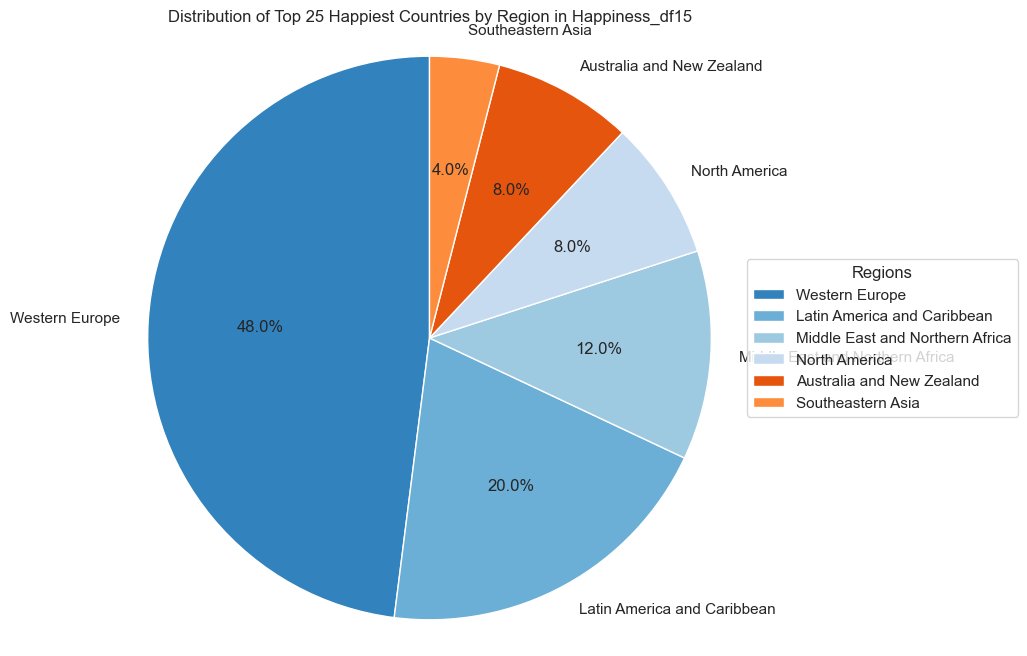

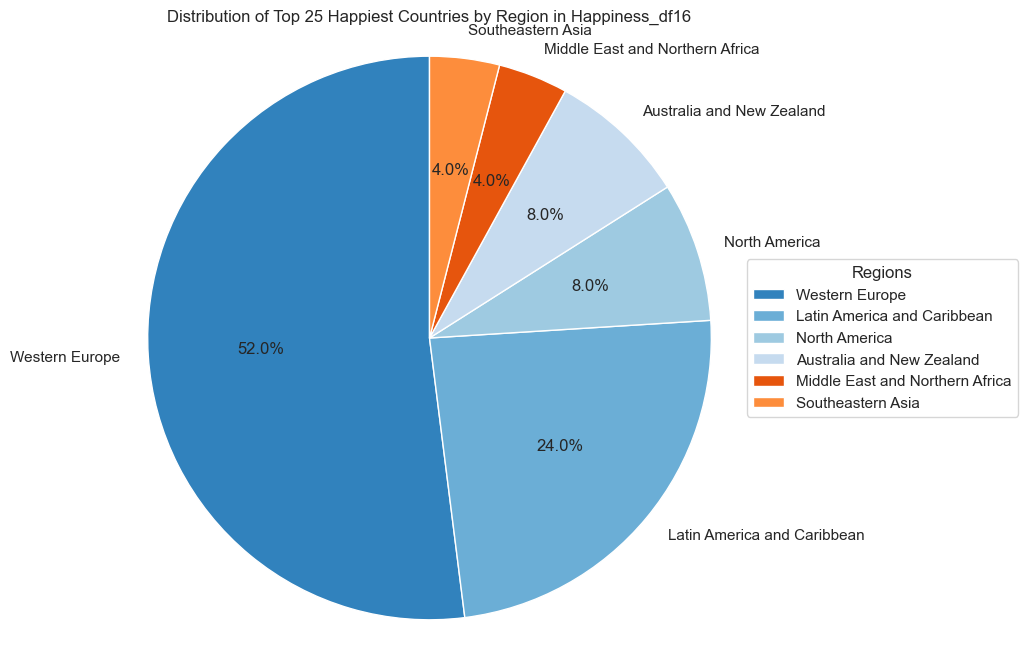

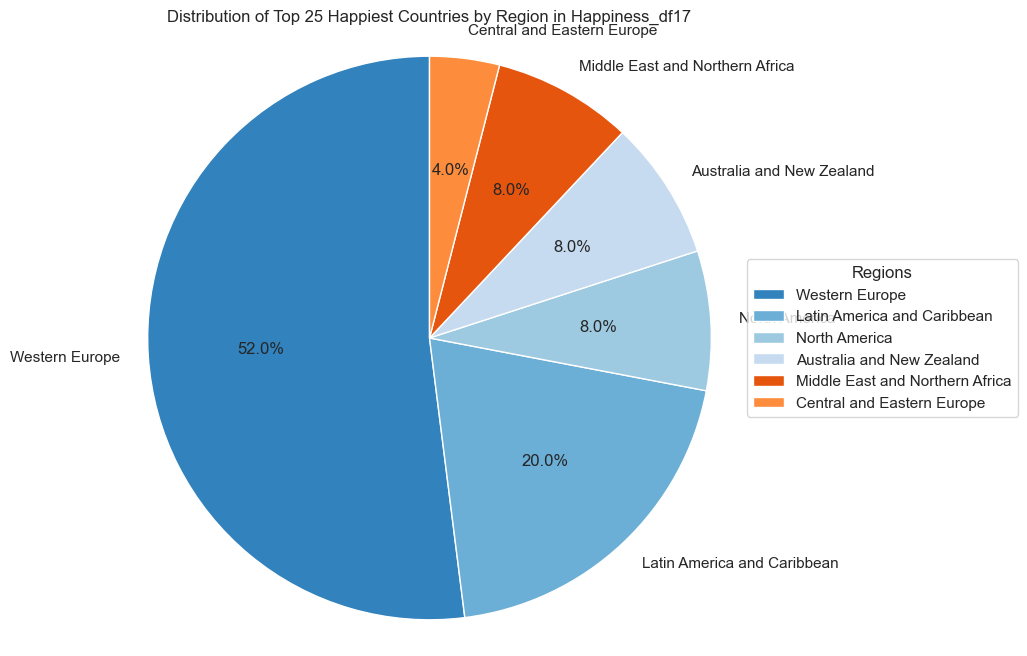

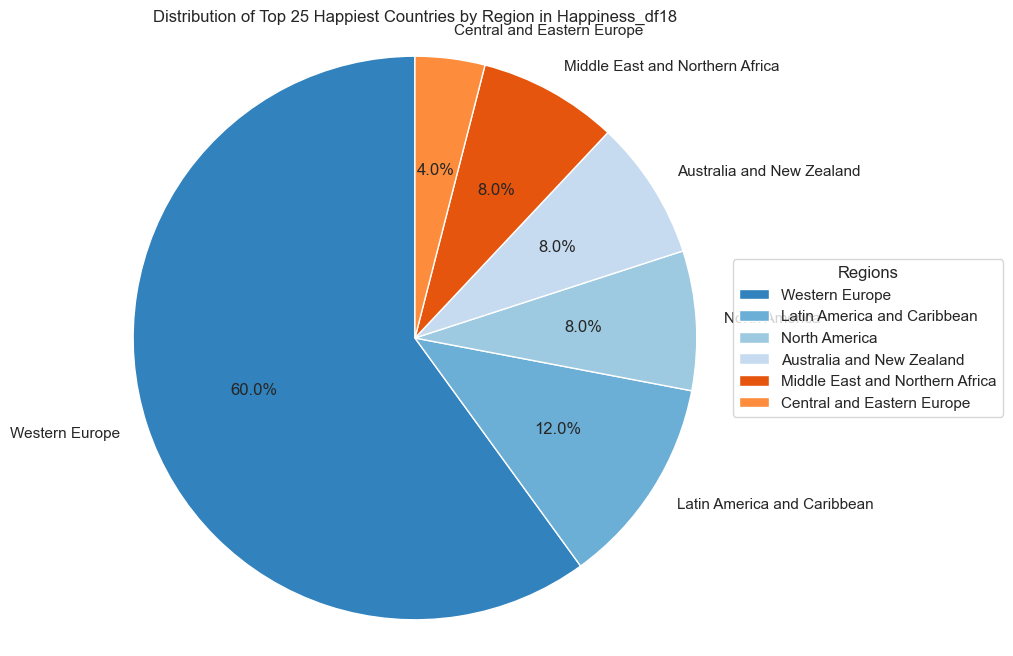

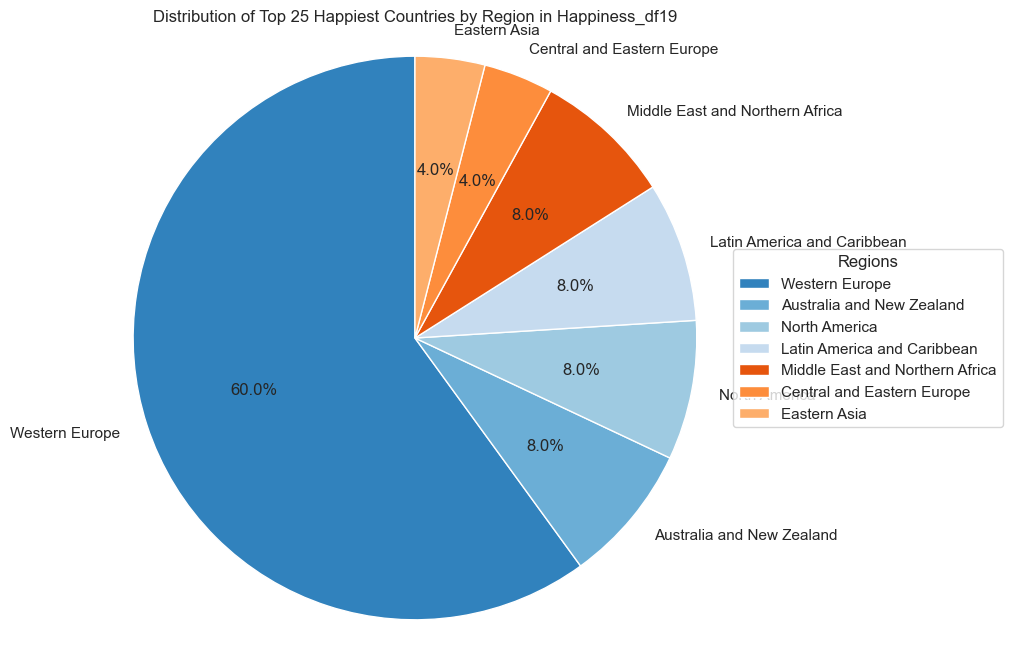

In [92]:
for key, data in Happiness_df.items():
    # Get the top 25 happiest countries for the current year
    top_countries = data.nsmallest(25, 'happiness_rank')

    # Grouping by region and counting countries
    region_counts = top_countries['region'].value_counts()

    # Define custom colors
    colors = plt.cm.tab20c.colors[:len(region_counts)]

    # Plotting
    plt.figure(figsize=(8, 8))
    plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
    plt.title(f'Distribution of Top 25 Happiest Countries by Region in {key}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.legend(title="Regions", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()


So the regions rank the highest in overall happiness is Finland	,Norway	,Denmark,Iceland	
,Switzerland,Netherlands,Canada	

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

 2- How did country ranks or scores change between the 2015 and 2016 as well as
the 2016 and 2017 reports?

C:\Users\Raghad Alharbi\AppData\Local\Temp\ipykernel_22232\3001306773.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='year', y='happiness_score', data=combined_df, palette='pastel')


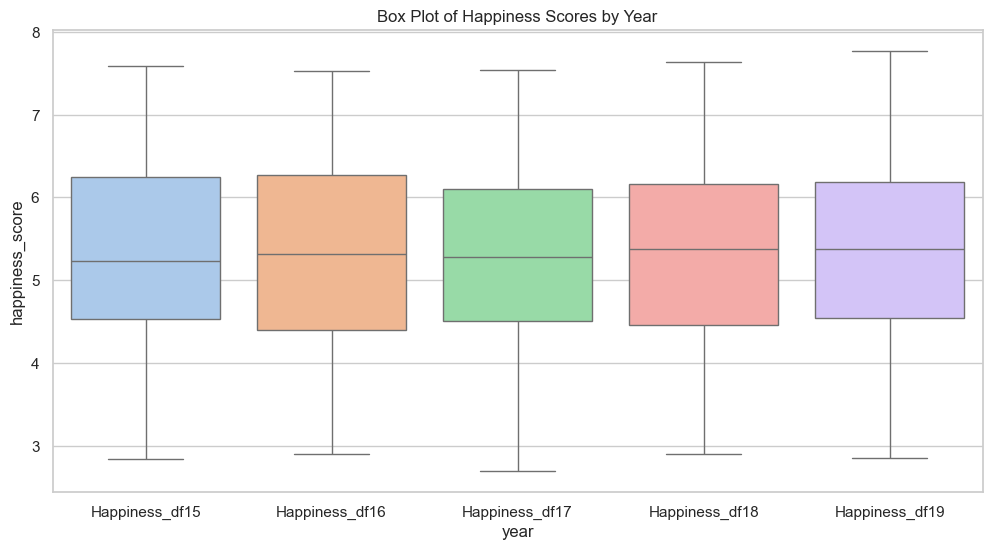

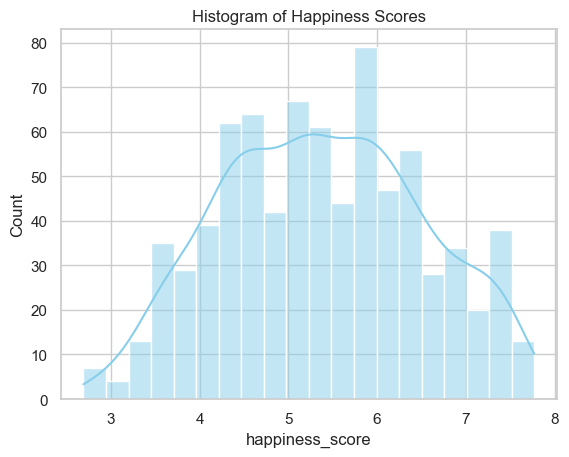

Significant changes in happiness based on highest 10 countries change:


year,Happiness_df15,Happiness_df16,change_Happiness_df15_Happiness_df16
country,,,
Algeria,5.605,6.355,0.750
Togo,2.839,3.303,0.464
Latvia,5.098,5.560,0.462
Romania,5.124,5.528,0.404
Hungary,4.800,5.145,0.345
Senegal,3.904,4.219,0.315
Tunisia,4.739,5.045,0.306
Lebanon,4.839,5.129,0.290
Nepal,4.514,4.793,0.279


year,Happiness_df16,Happiness_df17,change_Happiness_df16_Happiness_df17
country,,,
Bulgaria,4.217,4.714,0.497
Afghanistan,3.360,3.794,0.434
Syria,3.069,3.462,0.393
Egypt,4.362,4.735,0.373
South Africa,4.459,4.829,0.370
Gabon,4.121,4.465,0.344
Uganda,3.739,4.081,0.342
Senegal,4.219,4.535,0.316
Honduras,4.871,5.181,0.310


In [99]:
combined_df = pd.DataFrame()

for key in Happiness_df.keys():
    # Add the year as a column in each DataFrame
    current_df = Happiness_df[key].copy()
    current_df['year'] = key
    combined_df = pd.concat([combined_df, current_df], ignore_index=True)

# Descriptive Analysis - Box plot and Histogram for happiness_score
plt.figure(figsize=(12, 6))

# Create a box plot
sns.boxplot(x='year', y='happiness_score', data=combined_df, palette='pastel')
plt.title('Box Plot of Happiness Scores by Year')
plt.show()

# Create a histogram for overall happiness scores without year differentiation
sns.histplot(combined_df['happiness_score'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Happiness Scores')
plt.show()

# Create visuals to analyze changes over years
pivot_df = combined_df.pivot_table(index='country', columns='year', values='happiness_score')

# Calculate the changes between years
years = sorted(Happiness_df.keys())
for i in range(len(years) - 1):
    pivot_df[f'change_{years[i]}_{years[i+1]}'] = round(pivot_df[years[i+1]] - pivot_df[years[i]], 3)

# Print significant changes
print("Significant changes in happiness based on highest 10 countries change:")
display(pivot_df.nlargest(10, f'change_{years[0]}_{years[1]}')[[years[0], years[1], f'change_{years[0]}_{years[1]}']])
display(pivot_df.nlargest(10, f'change_{years[1]}_{years[2]}')[[years[1], years[2], f'change_{years[1]}_{years[2]}']])

3- Did any country experience a significant increase or decrease in happiness?

In [101]:
combined_df = pd.DataFrame()
for key in Happiness_df.keys():
    # add the year as a column in each DataFrame
    current_df = Happiness_df[key].copy()
    current_df['year'] = key
    combined_df = pd.concat([combined_df, current_df], ignore_index=True)

# create a pivot table to analyze changes over years
pivot_df = combined_df.pivot_table(index='country', columns='year', values='happiness_score')

# calculate the changes between years
years = sorted(Happiness_df.keys())
for i in range(len(years) - 1):
    pivot_df[f'change_{years[i]}_{years[i+1]}'] = round(pivot_df[years[i+1]] - pivot_df[years[i]], 3)

# calculate the sum of changes for significant analysis
pivot_df["sum"] = pivot_df[[f'change_{years[i]}_{years[i+1]}' for i in range(len(years) - 1)]].sum(axis=1)

# find significant changes
significant_changes = pivot_df.nlargest(5, "sum")

# print significant changes
print("Significant changes in happiness:")
display(significant_changes)


Significant changes in happiness:


year,Happiness_df15,Happiness_df16,Happiness_df17,Happiness_df18,Happiness_df19,change_Happiness_df15_Happiness_df16,change_Happiness_df16_Happiness_df17,change_Happiness_df17_Happiness_df18,change_Happiness_df18_Happiness_df19,sum
country,,,,,,,,,,
Benin,3.340,3.484,3.657,4.141,4.883,0.144,0.173,0.484,0.742,1.543
Ivory Coast,3.655,3.916,4.180,4.671,4.944,0.261,0.264,0.491,0.273,1.289
Togo,2.839,3.303,3.495,3.999,4.085,0.464,0.192,0.504,0.086,1.246
Honduras,4.788,4.871,5.181,5.504,5.860,0.083,0.310,0.323,0.356,1.072
Burkina Faso,3.587,3.739,4.032,4.424,4.587,0.152,0.293,0.392,0.163,1.000


In [118]:
combined_df = pd.DataFrame()
for key in Happiness_df.keys():
    # add the year as a column in each DataFrame
    current_df = Happiness_df[key].copy()
    current_df['year'] = key
    combined_df = pd.concat([combined_df, current_df], ignore_index=True)


# create visuals to analysis changes over years
pivot_df = combined_df.pivot_table(index='country', columns='year', values='happiness_score')

# here we calculate the changes between years
years = sorted(Happiness_df.keys())
for i in range(len(years) - 1):
    pivot_df[f'change_{years[i]}_{years[i+1]}'] = round(pivot_df[years[i+1]] - pivot_df[years[i]], 3)

# if the change is more than 0.5 the this will be consider significate
significant_changes_columns = [f'change_{years[i]}_{years[i+1]}' for i in range(len(years) - 1)]

pivot_df["sum"] = pivot_df.loc[:, significant_changes_columns].sum(axis=1)
# iterate through the df to check for change of more than 0.5
significant_changes = pivot_df["sum"] < -.5


significant_changes = pivot_df[significant_changes].nsmallest(5, "sum")[["Happiness_df15","Happiness_df16","Happiness_df17","Happiness_df18","Happiness_df19","sum"]]

# print significant changes
print("Significant changes in happiness:")
display(significant_changes)

Significant changes in happiness:


year,Happiness_df15,Happiness_df16,Happiness_df17,Happiness_df18,Happiness_df19,sum
country,,,,,,
Venezuela,6.810,6.084,5.250,4.806,4.707,-2.103
Zambia,5.129,4.795,4.514,4.377,4.107,-1.022
South Sudan,NaN,3.832,3.591,3.254,2.853,-0.979
Zimbabwe,4.610,4.193,3.875,3.692,3.663,-0.947
Haiti,4.518,4.028,3.603,3.582,3.597,-0.921


This tables illustrates the fluctuations in happiness scores for chosen countries between 2015 and 2019, emphasizing the overall decline and rise in happiness over this duration, which is reflected in the 'Sum' column.

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

In [105]:
for year, data in Happiness_df.items():
    print(year)
    columns_to_describe = ["region", "happiness_score", "gdp_per_capita", "social_support",
                           "life_expectancy", "freedom", "generosity", "government_trust"]
    if "dystopia_residual" in data.columns:
        columns_to_describe.append("dystopia_residual")
        display(data[columns_to_describe].describe().T)
    else:
        display(data[columns_to_describe].describe().T.drop("dystopia_residual", errors='ignore'))



Happiness_df15


,count,mean,std,min,25%,50%,75%,max
happiness_score,158.0,5.375734,1.145010,2.83900,4.526000,5.232500,6.243750,7.58700
gdp_per_capita,158.0,0.846137,0.403121,0.00000,0.545808,0.910245,1.158448,1.69042
social_support,158.0,0.991046,0.272369,0.00000,0.856823,1.029510,1.214405,1.40223
life_expectancy,158.0,0.630259,0.247078,0.00000,0.439185,0.696705,0.811013,1.02525
freedom,158.0,0.428615,0.150693,0.00000,0.328330,0.435515,0.549092,0.66973
generosity,158.0,0.237296,0.126685,0.00000,0.150553,0.216130,0.309883,0.79588
government_trust,158.0,0.143422,0.120034,0.00000,0.061675,0.107220,0.180255,0.55191
dystopia_residual,158.0,2.098977,0.553550,0.32858,1.759410,2.095415,2.462415,3.60214


Happiness_df16


,count,mean,std,min,25%,50%,75%,max
happiness_score,157.0,5.382185,1.141674,2.90500,4.40400,5.31400,6.26900,7.52600
gdp_per_capita,157.0,0.953880,0.412595,0.00000,0.67024,1.02780,1.27964,1.82427
social_support,157.0,0.793621,0.266706,0.00000,0.64184,0.84142,1.02152,1.18326
life_expectancy,157.0,0.557619,0.229349,0.00000,0.38291,0.59659,0.72993,0.95277
freedom,157.0,0.370994,0.145507,0.00000,0.25748,0.39747,0.48453,0.60848
generosity,157.0,0.242635,0.133756,0.00000,0.15457,0.22245,0.31185,0.81971
government_trust,157.0,0.137624,0.111038,0.00000,0.06126,0.10547,0.17554,0.50521
dystopia_residual,157.0,2.325807,0.542220,0.81789,2.03171,2.29074,2.66465,3.83772


Happiness_df17


,count,mean,std,min,25%,50%,75%,max
happiness_score,155.0,5.354019,1.131230,2.693000,4.505500,5.279000,6.101500,7.537000
gdp_per_capita,155.0,0.984718,0.420793,0.000000,0.663371,1.064578,1.318027,1.870766
social_support,155.0,1.188898,0.287263,0.000000,1.042635,1.253918,1.414316,1.610574
life_expectancy,155.0,0.551341,0.237073,0.000000,0.369866,0.606042,0.723008,0.949492
freedom,155.0,0.408786,0.149997,0.000000,0.303677,0.437454,0.516561,0.658249
generosity,155.0,0.246883,0.134780,0.000000,0.154106,0.231538,0.323762,0.838075
government_trust,155.0,0.123120,0.101661,0.000000,0.057271,0.089848,0.153296,0.464308
dystopia_residual,155.0,1.850238,0.500028,0.377914,1.591291,1.832910,2.144654,3.117485


Happiness_df18


,count,mean,std,min,25%,50%,75%,max
happiness_score,156.0,5.375917,1.119506,2.905,4.45375,5.3780,6.16850,7.632
gdp_per_capita,156.0,0.891449,0.391921,0.000,0.61625,0.9495,1.19775,2.096
social_support,156.0,1.213237,0.302372,0.000,1.06675,1.2550,1.46300,1.644
life_expectancy,156.0,0.597346,0.247579,0.000,0.42225,0.6440,0.77725,1.030
freedom,156.0,0.454506,0.162424,0.000,0.35600,0.4870,0.57850,0.724
generosity,156.0,0.181006,0.098471,0.000,0.10950,0.1740,0.23900,0.598
government_trust,156.0,0.112000,0.096180,0.000,0.05100,0.0820,0.13650,0.457


Happiness_df19


,count,mean,std,min,25%,50%,75%,max
happiness_score,156.0,5.407096,1.113120,2.853,4.54450,5.3795,6.18450,7.769
gdp_per_capita,156.0,0.905147,0.398389,0.000,0.60275,0.9600,1.23250,1.684
social_support,156.0,1.208814,0.299191,0.000,1.05575,1.2715,1.45250,1.624
life_expectancy,156.0,0.725244,0.242124,0.000,0.54775,0.7890,0.88175,1.141
freedom,156.0,0.392571,0.143289,0.000,0.30800,0.4170,0.50725,0.631
generosity,156.0,0.184846,0.095254,0.000,0.10875,0.1775,0.24825,0.566
government_trust,156.0,0.110603,0.094538,0.000,0.04700,0.0855,0.14125,0.453


In [107]:
import pandas as pd

factors = ["gdp_per_capita", "social_support", "life_expectancy", "freedom", "government_trust", "generosity"]

results = []

for year, data in Happiness_df.items():
    for factor in factors:
        # Find the happiest region for each factor in each year
        happiest_region = data.groupby('region')[factor].mean().idxmax()
        happiest_score = data.groupby('region')[factor].mean().max()
        results.append({
            "Year": year,
            "Factor": factor,
            "Region": happiest_region,
            "Score": happiest_score
        })

# Convert the list of dictionaries into a DataFrame
results_df = pd.DataFrame(results)

# Sort the DataFrame to get the top 3 happiest regions for each factor
top_3_per_region = (results_df.sort_values(by=['Region', 'Score'], ascending=[True, False])
                     .groupby('Region').head(3))

# Display the filtered DataFrame
display(top_3_per_region)


,Year,Factor,Region,Score
19,Happiness_df18,social_support,Australia and New Zealand,1.587000
25,Happiness_df19,social_support,Australia and New Zealand,1.552500
13,Happiness_df17,social_support,Australia and New Zealand,1.529119
12,Happiness_df17,gdp_per_capita,North America,1.512732
6,Happiness_df16,gdp_per_capita,North America,1.474055
24,Happiness_df19,gdp_per_capita,North America,1.399000
14,Happiness_df17,life_expectancy,Unknown!,0.868523
20,Happiness_df18,life_expectancy,Western Europe,0.895800


The table illustrates the regions with the most elevated average scores for diverse happiness factors annually.

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

In [ ]:
#There is no Categorical & Categorical can be used in data set 

**Categorical & numerical --> (scatter plot, histogram, box plot)**

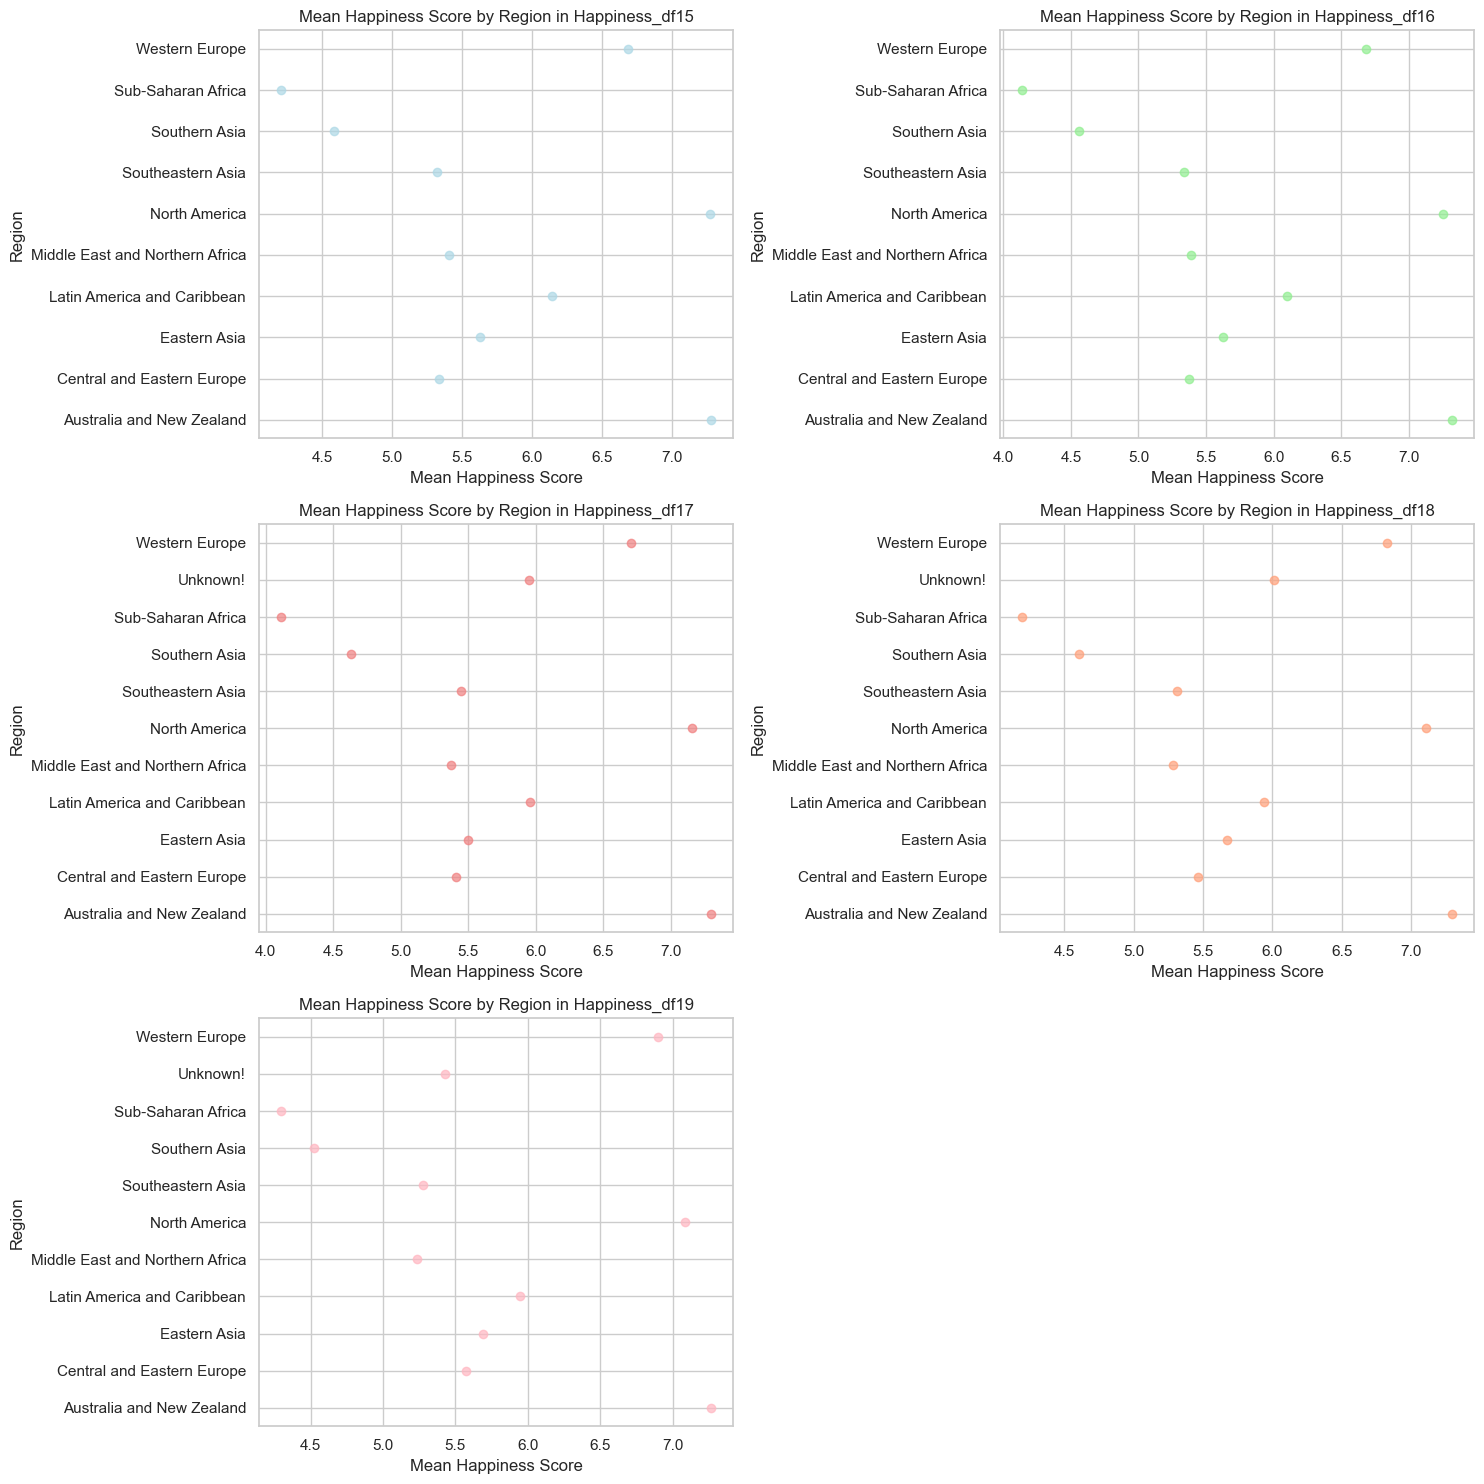

In [110]:
import matplotlib.pyplot as plt

# Determine the number of subplots needed and organize them into two columns per row
n_years = len(Happiness_df)
n_rows = (n_years + 1) // 2
fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(15, 5 * n_rows))

# Flatten the axes array for easier iteration if it's multidimensional
axes = axes.flatten()

# Define colors for the scatter plots
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink', 'lightseagreen']

# Iterate over each year and corresponding DataFrame
for (key, value), ax, color in zip(Happiness_df.items(), axes, colors):
    
    # Group the data by 'region' and calculate the mean 'happiness_score' for each region
    mean_happiness_by_region = value.groupby('region')['happiness_score'].mean()
    
    # Get x and y data for scatter plot
    x = mean_happiness_by_region.values
    y = mean_happiness_by_region.index
    
    # Plotting as a scatter plot on each subplot axis
    ax.scatter(x, y, color=color, alpha=0.7)
    ax.set_title(f'Mean Happiness Score by Region in {key}')
    ax.set_xlabel('Mean Happiness Score')
    ax.set_ylabel('Region')

# If there are an odd number of items, hide the last subplot if it's unused
if n_years % 2 != 0:
    axes[-1].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


**numerical & numerical --> (Scatter plot, line chart)**

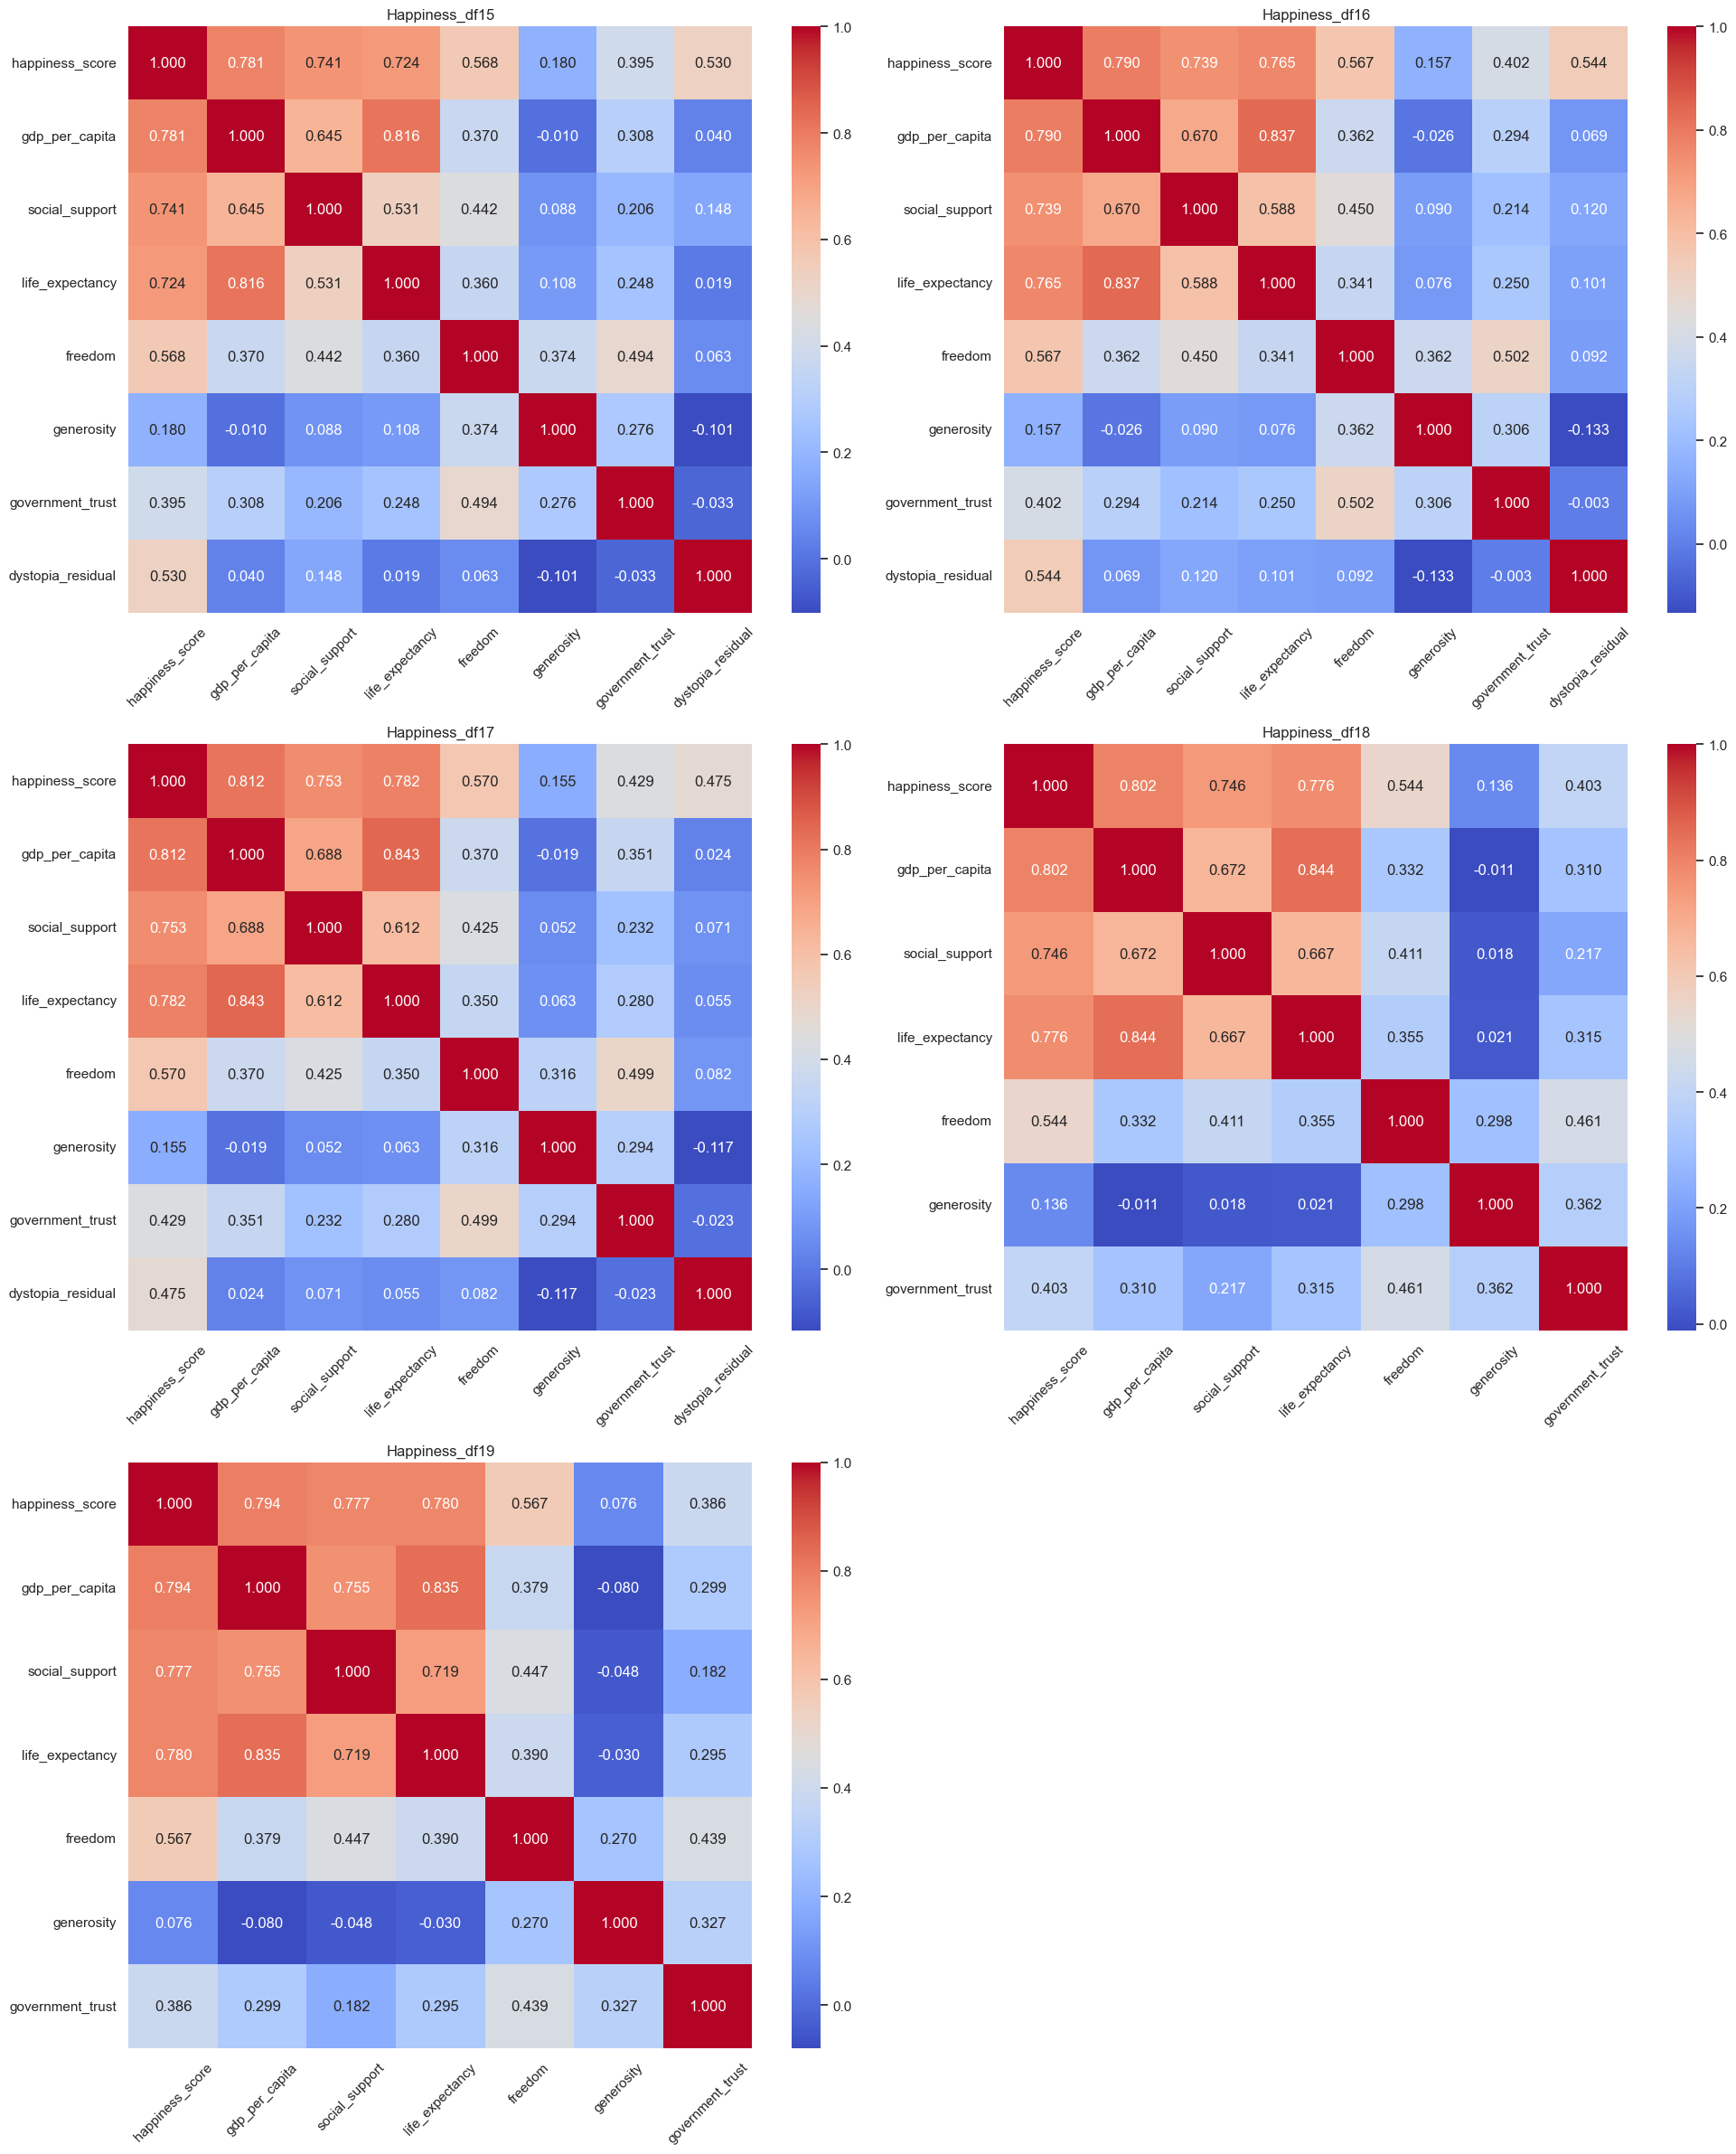

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Determine the number of items
num_items = len(Happiness_df)

# Set the number of columns in the grid
cols = 2
# Calculate rows needed
rows = (num_items + cols - 1) // cols

# Adjust the figure size and layout
plt.figure(figsize=(20, 8 * rows))  # Adjust the height based on the number of rows

subplot_index = 1

for key, value in Happiness_df.items():
    # Filter columns to ensure 'dystopia_residual' exists
    selected_columns = ["happiness_score", "gdp_per_capita", "social_support", 
                        "life_expectancy", "freedom", "generosity", "government_trust"]
    if "dystopia_residual" in value.columns:
        selected_columns.append("dystopia_residual")
    
    corr = value[selected_columns].corr()

    # Specify the location of the subplot
    plt.subplot(rows, cols, subplot_index)
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".3f")
    plt.xticks(rotation=45)
    plt.title(key)

    subplot_index += 1

# Show the plot
plt.tight_layout()
plt.show()


Economic production, social support, and life expectancy are usually the most significant contributors to high happiness scores 

We could also use a correlation matrix to get more specific information about the relationship between these two variables.